In [1]:
import gzip

# File path
filename = "/Users/tusharjoshi/Desktop/ProjectWorkAll/Dissertation /DATA/2025/2025-01-20-prusa.gz"


# First, let's see what the raw content looks like
with gzip.open(filename, 'rt', encoding='utf-8') as f:
    content = f.read()

print("First 1500 characters:")
print(content[:1500])
print("\n" + "="*50)
print("Last 1500 characters:")
print(content[-1500:])
print("\n" + "="*50)
print("Total length:", len(content))
print("Number of lines:", len(content.split('\n')))

First 1500 characters:
{"date":"2025-01-20T14:09:29.977Z","id":"CZPX1522X017XC78087","check":"success","data":{"state":"","tempBed":0,"targetBed":0,"tempNozzle":0,"targetNozzle":0,"axisZ":0,"axisX":0,"axisY":0,"flow":0,"speed":0,"fanHotend":0,"fanPrint":0}}
{"date":"2025-01-20T14:09:29.988Z","id":"CZPX4521X017XC64043","check":"success","data":{"state":"","tempBed":0,"targetBed":0,"tempNozzle":0,"targetNozzle":0,"axisZ":0,"axisX":0,"axisY":0,"flow":0,"speed":0,"fanHotend":0,"fanPrint":0}}
{"date":"2025-01-20T14:09:31.028Z","id":"CZPX1622X017XC78384","check":"success","data":{"state":"","tempBed":0,"targetBed":0,"tempNozzle":0,"targetNozzle":0,"axisZ":0,"axisX":0,"axisY":0,"flow":0,"speed":0,"fanHotend":0,"fanPrint":0}}
{"date":"2025-01-20T14:09:31.038Z","id":"CZPX1522X017XC78307","check":"success","data":{"state":"","tempBed":0,"targetBed":0,"tempNozzle":0,"targetNozzle":0,"axisZ":0,"axisX":0,"axisY":0,"flow":0,"speed":0,"fanHotend":0,"fanPrint":0}}
{"date":"2025-01-20T14:09:31.047Z","i

<h2>We need to read the compressed file line by line and get some basic answers for<br> How many printers we have
<br>How many records per printer
<br>What data fields are available</h2>

In [2]:
import gzip
import json

# File path
filename = "/Users/tusharjoshi/Desktop/ProjectWorkAll/Dissertation /DATA/2025/2025-01-20-prusa.gz"

# Read the file line by line since it's JSONL format
records = []
with gzip.open(filename, 'rt', encoding='utf-8') as f:
    for line in f:
        if line.strip():  # Skip empty lines
            record = json.loads(line)
            records.append(record)

print("Total records loaded:", len(records))
print("\n" + "="*50)

# Look at the first record
print("FIRST RECORD:")
first_record = records[0]
for key, value in first_record.items():
    print(f"  {key}: {value}")

print("\n" + "="*50)

# Look at the last record
print("LAST RECORD:")
last_record = records[-1]
for key, value in last_record.items():
    print(f"  {key}: {value}")

print("\n" + "="*50)

# Find all unique printer IDs
printer_ids = set()
for record in records:
    printer_ids.add(record['id'])

print("UNIQUE PRINTER IDs:")
for pid in sorted(printer_ids):
    print(f"  {pid}")

print(f"\nTotal number of printers: {len(printer_ids)}")

print("\n" + "="*50)

# Look at data fields in first few records
print("DATA FIELDS IN FIRST 5 RECORDS:")
for i in range(5):
    data_keys = list(records[i]['data'].keys())
    print(f"  Record {i+1}: {data_keys}")

print("\n" + "="*50)

# Count records per printer
printer_counts = {}
for record in records:
    pid = record['id']
    printer_counts[pid] = printer_counts.get(pid, 0) + 1

print("RECORDS PER PRINTER:")
for pid, count in sorted(printer_counts.items()):
    print(f"  {pid}: {count} records")

Total records loaded: 121279

FIRST RECORD:
  date: 2025-01-20T14:09:29.977Z
  id: CZPX1522X017XC78087
  check: success
  data: {'state': '', 'tempBed': 0, 'targetBed': 0, 'tempNozzle': 0, 'targetNozzle': 0, 'axisZ': 0, 'axisX': 0, 'axisY': 0, 'flow': 0, 'speed': 0, 'fanHotend': 0, 'fanPrint': 0}

LAST RECORD:
  date: 2025-01-20T23:59:58.681Z
  id: CZPX1622X017XC78456
  check: success
  data: {'tempBed': 18.7, 'tempNozzle': 19.2}

UNIQUE PRINTER IDs:
  CZPX1522X017XC78087
  CZPX1522X017XC78307
  CZPX1622X017XC78384
  CZPX1622X017XC78456
  CZPX1622X017XC78491
  CZPX4521X017XC64043
  CZPX4921X017XC67390

Total number of printers: 7

DATA FIELDS IN FIRST 5 RECORDS:
  Record 1: ['state', 'tempBed', 'targetBed', 'tempNozzle', 'targetNozzle', 'axisZ', 'axisX', 'axisY', 'flow', 'speed', 'fanHotend', 'fanPrint']
  Record 2: ['state', 'tempBed', 'targetBed', 'tempNozzle', 'targetNozzle', 'axisZ', 'axisX', 'axisY', 'flow', 'speed', 'fanHotend', 'fanPrint']
  Record 3: ['state', 'tempBed', 'targe

<h2>We need to do some basic cleaning and creating a basic dataframe to get answers for </h2>
<h4>The final shape of our clean dataset<br>
Which columns have missing data and how much<br>
What our data types look like<br>
A preview of the cleaned data<br></h4>

In [3]:
import gzip
import json
import pandas as pd

# File path
filename = "/Users/tusharjoshi/Desktop/ProjectWorkAll/Dissertation /DATA/2025/2025-01-20-prusa.gz"

# Read all records
records = []
with gzip.open(filename, 'rt', encoding='utf-8') as f:
    for line in f:
        if line.strip():
            record = json.loads(line)
            records.append(record)

print(f"Loaded {len(records)} records")

# Create a list to hold flattened data
clean_data = []

# Process each record
for record in records:
    # Start with main fields
    row = {
        'timestamp': record['date'],
        'printer_id': record['id'],
        'status': record['check']
    }
    
    # Add all data fields, using None for missing ones
    data_fields = record['data']
    row.update(data_fields)
    
    clean_data.append(row)

# Create DataFrame
df = pd.DataFrame(clean_data)

print("\nDataFrame created!")
print("Shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

print("\nFirst 7 rows:")
print(df.head(7))

print("\nMissing values per column:")
missing_counts = df.isnull().sum()
for col, count in missing_counts.items():
    if count > 0:
        print(f"  {col}: {count} missing ({count/len(df)*100:.1f}%)")

print("\nData types:")
print(df.dtypes)

Loaded 121279 records

DataFrame created!
Shape: (121279, 15)

Column names:
['timestamp', 'printer_id', 'status', 'state', 'tempBed', 'targetBed', 'tempNozzle', 'targetNozzle', 'axisZ', 'axisX', 'axisY', 'flow', 'speed', 'fanHotend', 'fanPrint']

First 7 rows:
                  timestamp           printer_id   status state  tempBed  \
0  2025-01-20T14:09:29.977Z  CZPX1522X017XC78087  success            0.0   
1  2025-01-20T14:09:29.988Z  CZPX4521X017XC64043  success            0.0   
2  2025-01-20T14:09:31.028Z  CZPX1622X017XC78384  success            0.0   
3  2025-01-20T14:09:31.038Z  CZPX1522X017XC78307  success            0.0   
4  2025-01-20T14:09:31.047Z  CZPX4921X017XC67390  success            0.0   
5  2025-01-20T14:10:52.218Z  CZPX1522X017XC78087  success            0.0   
6  2025-01-20T14:10:52.232Z  CZPX4521X017XC64043  success            0.0   

   targetBed  tempNozzle  targetNozzle  axisZ  axisX  axisY  flow  speed  \
0        0.0         0.0           0.0    0.0    0.0 

<h2>NOW WE CLEAN AND CREATE ONE DATAFRAME FOR ALL THE ZIP FILES IN THE DIRECTORY (2025)</h2>

In [4]:
import gzip
import json
import pandas as pd
import os
from glob import glob

# Directory containing all .gz files
data_directory = "/Users/tusharjoshi/Desktop/ProjectWorkAll/Dissertation /DATA/2025"  

# Find all .gz files
gz_files = glob(os.path.join(data_directory, "*.gz"))
print(f"Found {len(gz_files)} .gz files:")
for file in sorted(gz_files):
    print(f"  {os.path.basename(file)}")

print("\n" + "="*50)

# Function to process a single file
def process_single_file(filename):
    print(f"Processing: {os.path.basename(filename)}")
    
    # Extract date from filename (assumes format: YYYY-MM-DD-something.gz)
    base_name = os.path.basename(filename)
    date_part = base_name.split('-')[:3]  # Get first 3 parts: YYYY, MM, DD
    file_date = '-'.join(date_part)
    
    # Read records from file
    records = []
    with gzip.open(filename, 'rt', encoding='utf-8') as f:
        for line in f:
            if line.strip():
                record = json.loads(line)
                records.append(record)
    
    # Clean data
    clean_data = []
    for record in records:
        row = {
            'file_date': file_date,  # Add file date info
            'filename': base_name,   # Add filename info
            'timestamp': record['date'],
            'printer_id': record['id'],
            'status': record['check']
        }
        row.update(record['data'])
        clean_data.append(row)
    
    print(f"  Loaded {len(records)} records from {file_date}")
    return clean_data

# Process all files
all_data = []
for file in sorted(gz_files):
    file_data = process_single_file(file)
    all_data.extend(file_data)

print("\n" + "="*50)

# Create final DataFrame
df_combined = pd.DataFrame(all_data)

print("COMBINED DATASET SUMMARY:")
print(f"Total records: {len(df_combined)}")
print(f"Total columns: {len(df_combined.columns)}")
print(f"Date range: {df_combined['file_date'].min()} to {df_combined['file_date'].max()}")

print("\nRecords per file:")
file_counts = df_combined['filename'].value_counts().sort_index()
for filename, count in file_counts.items():
    print(f"  {filename}: {count} records")

print("\nFirst 3 rows of combined data:")
print(df_combined.head(3))

print("\nColumn names:")
print(df_combined.columns.tolist())

Found 93 .gz files:
  2025-01-20-prusa.gz
  2025-01-21-prusa.gz
  2025-01-22-prusa.gz
  2025-01-23-prusa.gz
  2025-01-24-prusa.gz
  2025-01-25-prusa.gz
  2025-01-26-prusa.gz
  2025-01-27-prusa.gz
  2025-01-28-prusa.gz
  2025-01-29-prusa.gz
  2025-01-30-prusa.gz
  2025-01-31-prusa.gz
  2025-02-01-prusa.gz
  2025-02-02-prusa.gz
  2025-02-03-prusa.gz
  2025-02-04-prusa.gz
  2025-02-05-prusa.gz
  2025-02-06-prusa.gz
  2025-02-07-prusa.gz
  2025-02-08-prusa.gz
  2025-02-09-prusa.gz
  2025-02-10-prusa.gz
  2025-02-11-prusa.gz
  2025-02-12-prusa.gz
  2025-02-13-prusa.gz
  2025-02-14-prusa.gz
  2025-02-15-prusa.gz
  2025-02-16-prusa.gz
  2025-02-17-prusa.gz
  2025-02-18-prusa.gz
  2025-02-19-prusa.gz
  2025-02-20-prusa.gz
  2025-02-21-prusa.gz
  2025-02-22-prusa.gz
  2025-02-23-prusa.gz
  2025-02-24-prusa.gz
  2025-02-25-prusa.gz
  2025-02-26-prusa.gz
  2025-02-27-prusa.gz
  2025-02-28-prusa.gz
  2025-03-01-prusa.gz
  2025-03-02-prusa.gz
  2025-03-03-prusa.gz
  2025-03-04-prusa.gz
  2025-03-05

<h3>We need to carry out some data validation checks in order to make sure </h3>
1. Basic Dataset Check

Shows total records, columns, and how much computer memory our data uses
Confirms our massive dataset is properly loaded

2. Date Coverage Analysis

Checks the first and last dates in our data
Looks for any missing days in our 3-month period
Tells us if we have complete daily coverage

3. Printer Verification

Lists all unique printer IDs to confirm we have 7 printers
Shows each printer ID clearly

4. Printer Activity Timeline

Checks if all printers were active across all days
Identifies if any printers went offline during certain periods

5. Missing Data Deep Dive

Shows exactly how much data is missing for each measurement
Gives percentages so we know what's reliable vs. sparse

6. Data Type Verification

Confirms all our data is in the right format (numbers, text, etc.)
Important for ensuring calculations will work properly

7. Temperature Reality Check

Looks at temperature ranges to spot impossible values
Shows min, max, and average temperatures
Helps identify sensor errors (like -999°C readings)

8. Status Verification

Confirms all records show "success" status
Spots any failed data collection attempts

9. Daily Pattern Preview

Shows record counts for first 10 days
Helps verify our daily patterns are consistent

In [5]:
import pandas as pd
import numpy as np


print("DATA VALIDATION & QUALITY CHECKS")
print("="*50)

# 1. Basic Dataset Info
print("1. BASIC DATASET INFORMATION:")
print(f"   Total records: {len(df_combined):,}")
print(f"   Total columns: {len(df_combined.columns)}")
print(f"   Memory usage: {df_combined.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print("\n2. DATE RANGE AND COVERAGE:")
print(f"   First date: {df_combined['file_date'].min()}")
print(f"   Last date: {df_combined['file_date'].max()}")
print(f"   Total days: {df_combined['file_date'].nunique()}")

# Check for date gaps
all_dates = pd.date_range(start=df_combined['file_date'].min(), 
                         end=df_combined['file_date'].max(), 
                         freq='D')
actual_dates = pd.to_datetime(df_combined['file_date']).dt.date.unique()
missing_dates = set(all_dates.date) - set(actual_dates)

if missing_dates:
    print(f"   Missing dates: {sorted(missing_dates)}")
else:
    print("   No missing dates found")

print("\n3. PRINTER CONSISTENCY CHECK:")
unique_printers = df_combined['printer_id'].unique()
print(f"   Total unique printers: {len(unique_printers)}")
for printer in sorted(unique_printers):
    print(f"   {printer}")

# Check if all printers appear in all time periods
print("\n4. PRINTER ACTIVITY ACROSS TIME:")
printer_by_date = df_combined.groupby(['file_date', 'printer_id']).size().unstack(fill_value=0)
print("   Days with data per printer:")
for printer in sorted(unique_printers):
    if printer in printer_by_date.columns:
        days_active = (printer_by_date[printer] > 0).sum()
        print(f"   {printer}: {days_active} days")

print("\n5. MISSING DATA ANALYSIS:")
missing_data = df_combined.isnull().sum()
missing_percent = (missing_data / len(df_combined)) * 100

print("   Missing values by column:")
for col in df_combined.columns:
    if missing_data[col] > 0:
        print(f"   {col}: {missing_data[col]:,} ({missing_percent[col]:.1f}%)")
    else:
        print(f"   {col}: 0 (0.0%)")

print("\n6. DATA TYPE CHECK:")
print("   Current data types:")
for col, dtype in df_combined.dtypes.items():
    print(f"   {col}: {dtype}")

print("\n7. VALUE RANGE ANALYSIS (Temperature fields):")
temp_columns = ['tempBed', 'tempNozzle', 'targetBed', 'targetNozzle']
for col in temp_columns:
    if col in df_combined.columns:
        valid_data = df_combined[col].dropna()
        if len(valid_data) > 0:
            print(f"   {col}:")
            print(f"     Min: {valid_data.min():.1f}")
            print(f"     Max: {valid_data.max():.1f}")
            print(f"     Mean: {valid_data.mean():.1f}")
            print(f"     Records with data: {len(valid_data):,}")

print("\n8. STATUS CHECK:")
status_counts = df_combined['status'].value_counts()
print("   Status distribution:")
for status, count in status_counts.items():
    print(f"   {status}: {count:,} ({count/len(df_combined)*100:.1f}%)")

print("\n9. DAILY RECORD COUNTS (First 10 days):")
daily_counts = df_combined['file_date'].value_counts().sort_index()
for date, count in daily_counts.head(10).items():
    print(f"   {date}: {count:,} records")

DATA VALIDATION & QUALITY CHECKS
1. BASIC DATASET INFORMATION:
   Total records: 27,309,834
   Total columns: 17
   Memory usage: 12601.0 MB

2. DATE RANGE AND COVERAGE:
   First date: 2025-01-20
   Last date: 2025-04-29
   Total days: 93
   Missing dates: [datetime.date(2025, 3, 11), datetime.date(2025, 3, 12), datetime.date(2025, 3, 13), datetime.date(2025, 3, 14), datetime.date(2025, 3, 15), datetime.date(2025, 3, 16), datetime.date(2025, 3, 17)]

3. PRINTER CONSISTENCY CHECK:
   Total unique printers: 8
   CZPX1522X017XC78087
   CZPX1522X017XC78307
   CZPX1622X017XC78384
   CZPX1622X017XC78456
   CZPX1622X017XC78491
   CZPX4521X017XC64043
   CZPX4721X017XC66125
   CZPX4921X017XC67390

4. PRINTER ACTIVITY ACROSS TIME:
   Days with data per printer:
   CZPX1522X017XC78087: 92 days
   CZPX1522X017XC78307: 49 days
   CZPX1622X017XC78384: 92 days
   CZPX1622X017XC78456: 92 days
   CZPX1622X017XC78491: 92 days
   CZPX4521X017XC64043: 93 days
   CZPX4721X017XC66125: 41 days
   CZPX4921X01

<h1>BACKFILLING THE COMBINED DF</h1>
Backfilling Roadmap - Step by Step
Step 1: Data Preparation

Sort the entire DataFrame by printer_id, then timestamp
Convert timestamp strings to proper datetime objects
Verify sorting worked correctly

Step 2: Single Printer Test

Extract one printer's data as a test sample
Implement backfill logic on this small dataset
Manually verify the results look correct
Check before/after missing value counts

Step 3: Backfill All Printers

Apply the tested backfill logic to all 8 printers
Use pandas groupby + forward fill
Handle any edge cases that arise

Step 4: Results Validation

Compare missing value percentages before/after
Spot check a few printer timelines manually
Verify cross-day continuity worked
Check memory usage of final dataset

Step 5: Final Quality Check

Generate summary statistics
Verify data ranges still make sense
Confirm we're ready for analysis

In [6]:
import pandas as pd

#Data Preparation - Sort and Convert Timestamps

# Check current state
print("BEFORE SORTING:")
print(f"Total records: {len(df_combined):,}")
print("First 5 records (printer_id and timestamp):")
print(df_combined[['printer_id', 'timestamp']].head())

print("\n" + "-"*30)

# Convert timestamp to datetime
print("Converting timestamps to datetime format...")
df_combined['timestamp'] = pd.to_datetime(df_combined['timestamp'])
print("✓ Timestamp conversion completed")

print("\n" + "-"*30)

# Sort by printer_id first, then by timestamp
print("Sorting data by printer_id and timestamp...")
df_sorted = df_combined.sort_values(['printer_id', 'timestamp']).reset_index(drop=True)
print("✓ Sorting completed")

print("\n" + "-"*30)

print("AFTER SORTING:")
print(f"Total records: {len(df_sorted):,}")
print("First 5 records (printer_id and timestamp):")
print(df_sorted[['printer_id', 'timestamp']].head())

print("\nLast 5 records (printer_id and timestamp):")
print(df_sorted[['printer_id', 'timestamp']].tail())

print("\n" + "-"*30)

# Verify sorting worked - check one printer's timeline
first_printer = df_sorted['printer_id'].iloc[0]
first_printer_data = df_sorted[df_sorted['printer_id'] == first_printer]

print(f"VERIFICATION - {first_printer} timeline:")
print(f"Records for this printer: {len(first_printer_data):,}")
print(f"Date range: {first_printer_data['timestamp'].min()} to {first_printer_data['timestamp'].max()}")
print("First 3 timestamps for this printer:")
print(first_printer_data['timestamp'].head(3).tolist())

BEFORE SORTING:
Total records: 27,309,834
First 5 records (printer_id and timestamp):
            printer_id                 timestamp
0  CZPX1522X017XC78087  2025-01-20T14:09:29.977Z
1  CZPX4521X017XC64043  2025-01-20T14:09:29.988Z
2  CZPX1622X017XC78384  2025-01-20T14:09:31.028Z
3  CZPX1522X017XC78307  2025-01-20T14:09:31.038Z
4  CZPX4921X017XC67390  2025-01-20T14:09:31.047Z

------------------------------
Converting timestamps to datetime format...
✓ Timestamp conversion completed

------------------------------
Sorting data by printer_id and timestamp...
✓ Sorting completed

------------------------------
AFTER SORTING:
Total records: 27,309,834
First 5 records (printer_id and timestamp):
            printer_id                        timestamp
0  CZPX1522X017XC78087 2025-01-20 14:09:29.977000+00:00
1  CZPX1522X017XC78087 2025-01-20 14:10:52.218000+00:00
2  CZPX1522X017XC78087 2025-01-20 14:13:28.516000+00:00
3  CZPX1522X017XC78087 2025-01-20 14:19:13.386000+00:00
4  CZPX1522X017XC7

<h1>confirming the data fields</h1>


In [7]:
import pandas as pd

# VERIFICATION: Check what fields we have in df_sorted vs df_combined

print("DATA FIELDS VERIFICATION")
print("="*50)

# Check df_combined fields
print("df_combined COLUMNS:")
print(f"Total columns: {len(df_combined.columns)}")
for i, col in enumerate(df_combined.columns):
    print(f"  {i+1}. {col}: {df_combined[col].dtype}")

print("\n" + "-"*30)

# Check df_sorted fields  
print("df_sorted COLUMNS:")
print(f"Total columns: {len(df_sorted.columns)}")
for i, col in enumerate(df_sorted.columns):
    print(f"  {i+1}. {col}: {df_sorted[col].dtype}")

print("\n" + "-"*30)

# Check if they are the same
columns_match = list(df_combined.columns) == list(df_sorted.columns)
print(f"Columns match between df_combined and df_sorted: {columns_match}")

if not columns_match:
    print("DIFFERENCES:")
    combined_cols = set(df_combined.columns)
    sorted_cols = set(df_sorted.columns)
    
    missing_in_sorted = combined_cols - sorted_cols
    extra_in_sorted = sorted_cols - combined_cols
    
    if missing_in_sorted:
        print(f"Missing in df_sorted: {missing_in_sorted}")
    if extra_in_sorted:
        print(f"Extra in df_sorted: {extra_in_sorted}")

print("\n" + "-"*30)

# Show sample records from both DataFrames
print("SAMPLE RECORD COMPARISON:")
print("df_combined first record:")
print(df_combined.iloc[0])

print("\ndf_sorted first record:")
print(df_sorted.iloc[0])

print("\n" + "-"*30)

# Identify fields for backfilling
print("BACKFILL FIELD CLASSIFICATION:")
print("Fields to EXCLUDE from backfilling (as requested):")
exclude_fields = ['axisZ', 'axisX', 'axisY']
for field in exclude_fields:
    if field in df_sorted.columns:
        print(f"  ✓ {field} - EXCLUDE")
    else:
        print(f"  ✗ {field} - NOT FOUND")

print("\nFields to INCLUDE in backfilling:")
metadata_fields = ['file_date', 'filename', 'timestamp', 'printer_id', 'status']
sensor_fields = []

for col in df_sorted.columns:
    if col not in exclude_fields and col not in metadata_fields:
        sensor_fields.append(col)
        print(f"  ✓ {col} - INCLUDE")

print(f"\nSUMMARY:")
print(f"  Metadata fields (no backfill needed): {len(metadata_fields)}")
print(f"  Sensor fields (need backfill): {len(sensor_fields)}")
print(f"  Excluded fields: {len(exclude_fields)}")
print(f"  Total fields: {len(df_sorted.columns)}")

print(f"\nSensor fields for backfilling: {sensor_fields}")

DATA FIELDS VERIFICATION
df_combined COLUMNS:
Total columns: 17
  1. file_date: object
  2. filename: object
  3. timestamp: datetime64[ns, UTC]
  4. printer_id: object
  5. status: object
  6. state: object
  7. tempBed: float64
  8. targetBed: float64
  9. tempNozzle: float64
  10. targetNozzle: float64
  11. axisZ: float64
  12. axisX: float64
  13. axisY: float64
  14. flow: float64
  15. speed: float64
  16. fanHotend: float64
  17. fanPrint: float64

------------------------------
df_sorted COLUMNS:
Total columns: 17
  1. file_date: object
  2. filename: object
  3. timestamp: datetime64[ns, UTC]
  4. printer_id: object
  5. status: object
  6. state: object
  7. tempBed: float64
  8. targetBed: float64
  9. tempNozzle: float64
  10. targetNozzle: float64
  11. axisZ: float64
  12. axisX: float64
  13. axisY: float64
  14. flow: float64
  15. speed: float64
  16. fanHotend: float64
  17. fanPrint: float64

------------------------------
Columns match between df_combined and df_so

<h1>Testing the backfill logic on 1 printer </h1>

In [8]:
import pandas as pd

# Step 2B: Single Printer Test - CORRECTED for ALL sensor fields INCLUDING AXIS

print("STEP 2B: SINGLE PRINTER TEST (CORRECTED - INCLUDING AXIS)")
print("="*50)

# Extract first printer's data for testing
first_printer_id = df_sorted['printer_id'].iloc[0]
print(f"Testing with printer: {first_printer_id}")

# Get all records for this printer
test_printer_data = df_sorted[df_sorted['printer_id'] == first_printer_id].copy()

print(f"Records for this printer: {len(test_printer_data):,}")
print(f"Date range: {test_printer_data['timestamp'].min()} to {test_printer_data['timestamp'].max()}")

print("\n" + "-"*30)

# Define sensor fields for backfilling (ALL 12 fields INCLUDING AXIS)
sensor_fields = ['state', 'tempBed', 'targetBed', 'tempNozzle', 'targetNozzle', 
                 'axisZ', 'axisX', 'axisY', 'flow', 'speed', 'fanHotend', 'fanPrint']

print("SENSOR FIELDS FOR BACKFILLING (INCLUDING AXIS):")
for field in sensor_fields:
    print(f"  ✓ {field}")

print("\n" + "-"*30)

# Check missing data BEFORE backfill for ALL sensor fields
print("MISSING DATA BEFORE BACKFILL:")
for col in sensor_fields:
    if col in test_printer_data.columns:
        missing_count = test_printer_data[col].isnull().sum()
        missing_percent = (missing_count / len(test_printer_data)) * 100
        print(f"  {col}: {missing_count:,} missing ({missing_percent:.1f}%)")

print("\n" + "-"*30)

# Show COMPLETE sample data before backfill
print("COMPLETE SAMPLE DATA BEFORE BACKFILL (first 10 records - ALL FIELDS):")
print(test_printer_data.head(10))

print("\n" + "-"*30)

# Apply forward fill to ALL sensor fields INCLUDING AXIS
test_backfilled = test_printer_data.copy()

print("Applying forward fill to ALL sensor fields (INCLUDING AXIS)...")
for col in sensor_fields:
    if col in test_backfilled.columns:
        test_backfilled[col] = test_backfilled[col].ffill()
        print(f"  ✓ Backfilled {col}")

print("✓ Forward fill completed for all sensor fields")

print("\n" + "-"*30)

# Check missing data AFTER backfill for ALL sensor fields
print("MISSING DATA AFTER BACKFILL:")
for col in sensor_fields:
    if col in test_backfilled.columns:
        missing_count = test_backfilled[col].isnull().sum()
        missing_percent = (missing_count / len(test_backfilled)) * 100
        print(f"  {col}: {missing_count:,} missing ({missing_percent:.1f}%)")

print("\n" + "-"*30)

# Show COMPLETE sample data after backfill
print("COMPLETE SAMPLE DATA AFTER BACKFILL (same 10 records - ALL FIELDS):")
# print(test_backfilled.head(10))

print(test_backfilled.tail(10))

print("\n" + "-"*30)

# Show complete data structure
# print("COMPLETE DATAFRAME STRUCTURE:")
# print(f"Total columns: {len(test_backfilled.columns)}")
# print("All columns:")
# for i, col in enumerate(test_backfilled.columns):
#     print(f"  {i+1}. {col}")

# print("\n" + "-"*30)

# Verify backfill logic with examples from multiple fields INCLUDING AXIS
print("BACKFILL VERIFICATION EXAMPLES:")

# Check sensor fields including axis for backfill examples
verification_fields = ['state', 'tempBed', 'axisX', 'axisY', 'flow']
for col in verification_fields:
    mask = test_printer_data[col].isnull() & test_backfilled[col].notnull()
    if mask.any():
        example_idx = mask.idxmax()
        print(f"  {col} - Index {example_idx}:")
        print(f"    Before: {test_printer_data.loc[example_idx, col]}")
        print(f"    After:  {test_backfilled.loc[example_idx, col]}")
        print(f"    Timestamp: {test_backfilled.loc[example_idx, 'timestamp']}")
    else:
        print(f"  {col}: No missing values found to demonstrate")

print("\n✓ Step 2B completed successfully!")

STEP 2B: SINGLE PRINTER TEST (CORRECTED - INCLUDING AXIS)
Testing with printer: CZPX1522X017XC78087
Records for this printer: 3,914,667
Date range: 2025-01-20 14:09:29.977000+00:00 to 2025-04-29 22:59:59.166000+00:00

------------------------------
SENSOR FIELDS FOR BACKFILLING (INCLUDING AXIS):
  ✓ state
  ✓ tempBed
  ✓ targetBed
  ✓ tempNozzle
  ✓ targetNozzle
  ✓ axisZ
  ✓ axisX
  ✓ axisY
  ✓ flow
  ✓ speed
  ✓ fanHotend
  ✓ fanPrint

------------------------------
MISSING DATA BEFORE BACKFILL:
  state: 3,913,955 missing (100.0%)
  tempBed: 1,900,244 missing (48.5%)
  targetBed: 3,914,350 missing (100.0%)
  tempNozzle: 1,889,227 missing (48.3%)
  targetNozzle: 3,914,016 missing (100.0%)
  axisZ: 3,879,343 missing (99.1%)
  axisX: 3,914,212 missing (100.0%)
  axisY: 3,914,259 missing (100.0%)
  flow: 3,914,352 missing (100.0%)
  speed: 3,914,567 missing (100.0%)
  fanHotend: 3,611,939 missing (92.3%)
  fanPrint: 3,672,859 missing (93.8%)

------------------------------
COMPLETE SAMPL

<h1>The above backfilled data logic works perfectly fine, and confirmed with adams backfilling logic results</h1><br>
<h1>Now we need to implement this logic on all the 8 printers</h1><br>


In [ ]:
# Step 3: Backfill All Printers - Apply to Complete Dataset

print("STEP 3: BACKFILL ALL PRINTERS")
print("="*50)

# Define sensor fields for backfilling (ALL 12 fields INCLUDING AXIS)
sensor_fields = ['state', 'tempBed', 'targetBed', 'tempNozzle', 'targetNozzle', 
                 'axisZ', 'axisX', 'axisY', 'flow', 'speed', 'fanHotend', 'fanPrint']

print("APPLYING BACKFILL TO COMPLETE DATASET:")
print(f"Total records to process: {len(df_sorted):,}")
print(f"Sensor fields to backfill: {len(sensor_fields)}")

print("\nSensor fields:")
for field in sensor_fields:
    print(f"  ✓ {field}")

print("\n" + "-"*30)

# Check missing data BEFORE backfill across all printers
print("MISSING DATA BEFORE BACKFILL (ALL PRINTERS):")
for col in sensor_fields:
    if col in df_sorted.columns:
        missing_count = df_sorted[col].isnull().sum()
        missing_percent = (missing_count / len(df_sorted)) * 100
        print(f"  {col}: {missing_count:,} missing ({missing_percent:.1f}%)")

print("\n" + "-"*30)

# Apply backfill using groupby for each printer
print("Processing each printer separately...")

# Create copy for backfilling
df_all_backfilled = df_sorted.copy()

# Function to backfill a single printer's data
def backfill_printer_data(group):
    """Apply forward fill to all sensor fields for a single printer"""
    for col in sensor_fields:
        if col in group.columns:
            group[col] = group[col].ffill()
    return group

# Apply backfill to each printer group
print("Applying forward fill by printer...")
df_all_backfilled = df_sorted.groupby('printer_id').apply(backfill_printer_data).reset_index(drop=True)

print("✓ Backfill completed for all printers")

print("\n" + "-"*30)

# Check missing data AFTER backfill
print("MISSING DATA AFTER BACKFILL (ALL PRINTERS):")
for col in sensor_fields:
    if col in df_all_backfilled.columns:
        missing_count = df_all_backfilled[col].isnull().sum()
        missing_percent = (missing_count / len(df_all_backfilled)) * 100
        print(f"  {col}: {missing_count:,} missing ({missing_percent:.1f}%)")

print("\n" + "-"*30)

# Verify data structure
print("FINAL DATASET STRUCTURE:")
print(f"Total records: {len(df_all_backfilled):,}")
print(f"Total columns: {len(df_all_backfilled.columns)}")
print(f"Memory usage: {df_all_backfilled.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print("\nPrinter record counts:")
printer_counts = df_all_backfilled['printer_id'].value_counts().sort_index()
for printer_id, count in printer_counts.items():
    print(f"  {printer_id}: {count:,} records")

print("\n" + "-"*30)

# Sample verification - show first records from each printer
print("SAMPLE VERIFICATION (first record from each printer):")
unique_printers = df_all_backfilled['printer_id'].unique()
for i, printer in enumerate(sorted(unique_printers)[:3]):  # Show first 3 printers
    first_record = df_all_backfilled[df_all_backfilled['printer_id'] == printer].iloc[0]
    print(f"\nPrinter {i+1}: {printer}")
    print(f"  Timestamp: {first_record['timestamp']}")
    print(f"  state: {first_record['state']}")
    print(f"  tempBed: {first_record['tempBed']}")
    print(f"  axisX: {first_record['axisX']}")
    print(f"  flow: {first_record['flow']}")

print("\n✓ Step 3 completed successfully!")

STEP 3: BACKFILL ALL PRINTERS
APPLYING BACKFILL TO COMPLETE DATASET:
Total records to process: 27,309,834
Sensor fields to backfill: 12

Sensor fields:
  ✓ state
  ✓ tempBed
  ✓ targetBed
  ✓ tempNozzle
  ✓ targetNozzle
  ✓ axisZ
  ✓ axisX
  ✓ axisY
  ✓ flow
  ✓ speed
  ✓ fanHotend
  ✓ fanPrint

------------------------------
MISSING DATA BEFORE BACKFILL (ALL PRINTERS):
  state: 27,305,567 missing (100.0%)
  tempBed: 15,053,425 missing (55.1%)
  targetBed: 27,308,082 missing (100.0%)
  tempNozzle: 14,593,961 missing (53.4%)
  targetNozzle: 27,306,050 missing (100.0%)
  axisZ: 27,094,261 missing (99.2%)
  axisX: 27,307,301 missing (100.0%)
  axisY: 27,307,600 missing (100.0%)
  flow: 27,308,166 missing (100.0%)
  speed: 27,309,196 missing (100.0%)
  fanHotend: 25,247,711 missing (92.4%)
  fanPrint: 25,679,214 missing (94.0%)

------------------------------
Processing each printer separately...
Applying forward fill by printer...


/var/folders/n3/lvjf2dhd2xbczw56rt1rzqx80000gn/T/ipykernel_62936/2507592238.py:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_all_backfilled = df_sorted.groupby('printer_id').apply(backfill_printer_data).reset_index(drop=True)


<h2>Now that we have the sorted df for all 8 printers we will do some basic check to ensure the dfs health and accuracy</h2>

<h3>What We're Validating:

Time order: Each printer's timeline flows correctly Jan→Apr<br>
Day transitions: Printer state carries logically from day to day<br>
Backfill accuracy: Missing values filled with proper previous values<br>

Expected Output:

Chronological check: All printers should show "✓ SORTED"<br>
Daily patterns: Should see logical state progression across days<br>
Backfill examples: Should show NaN→filled with sensible values</h3>

In [ ]:
# Check 1: Verify chronological order within each printer
print("CHECK 1: CHRONOLOGICAL ORDER VERIFICATION")

for printer in sorted(df_all_backfilled['printer_id'].unique())[:]:  # Check all printers
    printer_data = df_all_backfilled[df_all_backfilled['printer_id'] == printer]
    
    # Check if timestamps are in ascending order
    is_sorted = printer_data['timestamp'].is_monotonic_increasing
    
    print(f"  {printer}: {'✓ SORTED' if is_sorted else '⚠️ NOT SORTED'}")
    print(f"    First timestamp: {printer_data['timestamp'].iloc[0]}")
    print(f"    Last timestamp: {printer_data['timestamp'].iloc[-1]}")
    print(f"    Total records: {len(printer_data):,}")

print("\n" + "-"*30)

# Check 2: Cross-day boundary validation
print("CHECK 2: CROSS-DAY BOUNDARY VALIDATION")
print("Checking if printer states carry correctly across day boundaries...")

# Take first printer for detailed check
test_printer = df_all_backfilled['printer_id'].iloc[0]
printer_data = df_all_backfilled[df_all_backfilled['printer_id'] == test_printer]

# Group by date and check transitions
printer_data['date'] = printer_data['timestamp'].dt.date
daily_groups = printer_data.groupby('date')

print(f"\nAnalyzing {test_printer} across different days:")

transition_examples = []
for date in sorted(printer_data['date'].unique())[:5]:  # Check first 5 days
    day_data = daily_groups.get_group(date)
    
    print(f"  {date}: {len(day_data):,} records")
    print(f"    First record - tempBed: {day_data['tempBed'].iloc[0]}, state: '{day_data['state'].iloc[0]}'")
    print(f"    Last record  - tempBed: {day_data['tempBed'].iloc[-1]}, state: '{day_data['state'].iloc[-1]}'")
    
    # Store for transition check
    transition_examples.append({
        'date': date,
        'last_temp': day_data['tempBed'].iloc[-1],
        'last_state': day_data['state'].iloc[-1]
    })

print("\n" + "-"*30)

# Check 3: State transition logic
print("CHECK 3: STATE TRANSITION EXAMPLES")
print("Verifying that backfill logic worked correctly...")

# Find examples where original data was missing but got filled
sensor_fields = ['tempBed', 'state', 'axisX']

for field in sensor_fields:
    # Compare with original sorted data for this printer
    original_printer = df_sorted[df_sorted['printer_id'] == test_printer]
    backfilled_printer = df_all_backfilled[df_all_backfilled['printer_id'] == test_printer]
    
    # Find first instance where original was NaN but backfilled has value
    missing_mask = original_printer[field].isnull() & backfilled_printer[field].notnull()
    
    if missing_mask.any():
        first_filled_idx = missing_mask.idxmax()
        idx_in_printer = original_printer.index.get_loc(first_filled_idx)
        
        print(f"\n  {field} backfill example:")
        print(f"    Original: {original_printer[field].iloc[idx_in_printer]} (was missing)")
        print(f"    Filled: {backfilled_printer[field].iloc[idx_in_printer]} (now filled)")
        print(f"    Timestamp: {backfilled_printer['timestamp'].iloc[idx_in_printer]}")


CHECK 1: CHRONOLOGICAL ORDER VERIFICATION
  CZPX1522X017XC78087: ✓ SORTED
    First timestamp: 2025-01-20 14:09:29.977000+00:00
    Last timestamp: 2025-04-29 22:59:59.166000+00:00
    Total records: 3,914,667
  CZPX1522X017XC78307: ✓ SORTED
    First timestamp: 2025-01-20 14:09:31.038000+00:00
    Last timestamp: 2025-03-11 00:00:00.886000+00:00
    Total records: 2,083,568
  CZPX1622X017XC78384: ✓ SORTED
    First timestamp: 2025-01-20 14:09:31.028000+00:00
    Last timestamp: 2025-04-29 22:59:59.165000+00:00
    Total records: 3,914,665
  CZPX1622X017XC78456: ✓ SORTED
    First timestamp: 2025-01-20 14:20:39.790000+00:00
    Last timestamp: 2025-04-29 23:00:01.363000+00:00
    Total records: 3,914,663
  CZPX1622X017XC78491: ✓ SORTED
    First timestamp: 2025-01-20 14:19:13.463000+00:00
    Last timestamp: 2025-04-29 22:59:59.798000+00:00
    Total records: 3,914,662
  CZPX4521X017XC64043: ✓ SORTED
    First timestamp: 2025-01-20 14:09:29.988000+00:00
    Last timestamp: 2025-04-29 2

/var/folders/n3/lvjf2dhd2xbczw56rt1rzqx80000gn/T/ipykernel_54803/602799717.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  printer_data['date'] = printer_data['timestamp'].dt.date



Analyzing CZPX1522X017XC78087 across different days:
  2025-01-20: 17,326 records
    First record - tempBed: 0.0, state: ''
    Last record  - tempBed: 19.4, state: 'FINISHED'
  2025-01-21: 43,055 records
    First record - tempBed: 19.4, state: 'FINISHED'
    Last record  - tempBed: 19.7, state: 'FINISHED'
  2025-01-22: 43,054 records
    First record - tempBed: 19.7, state: 'FINISHED'
    Last record  - tempBed: 19.6, state: 'FINISHED'
  2025-01-23: 43,055 records
    First record - tempBed: 19.6, state: 'FINISHED'
    Last record  - tempBed: 60.2, state: 'PRINTING'
  2025-01-24: 43,056 records
    First record - tempBed: 60.2, state: 'PRINTING'
    Last record  - tempBed: 20.0, state: 'IDLE'

------------------------------
CHECK 3: STATE TRANSITION EXAMPLES
Verifying that backfill logic worked correctly...

  tempBed backfill example:
    Original: nan (was missing)
    Filled: 20.5 (now filled)
    Timestamp: 2025-01-20 14:20:49.823000+00:00

  state backfill example:
    Origina

<h2>we need to check and validate the data range for different parameters </h2><br>
What We're Validating:<br>

 Temperature ranges: Realistic values for 3D printer operation<br>
 Position limits: Printhead stays within printer boundaries<br>
 Operational parameters: Flow/speed percentages make sense<br>
 Heating logic: Target temps higher than actual when heating<br>

In [ ]:
# Define realistic ranges for 3D printer sensors
realistic_ranges = {
    'tempBed': {'min': -20, 'max': 120, 'name': 'Bed Temperature (°C)'},
    'tempNozzle': {'min': -10, 'max': 300, 'name': 'Nozzle Temperature (°C)'},
    'targetBed': {'min': 0, 'max': 120, 'name': 'Target Bed Temp (°C)'},
    'targetNozzle': {'min': 0, 'max': 300, 'name': 'Target Nozzle Temp (°C)'},
    'axisX': {'min': -50, 'max': 250, 'name': 'X Position (mm)'},
    'axisY': {'min': -50, 'max': 250, 'name': 'Y Position (mm)'},
    'axisZ': {'min': -10, 'max': 250, 'name': 'Z Position (mm)'},
    'flow': {'min': 0, 'max': 200, 'name': 'Flow Rate (%)'},
    'speed': {'min': 0, 'max': 200, 'name': 'Speed (%)'}
}

print("CHECK: SENSOR VALUE RANGES")
print("Checking each sensor for values outside realistic operational ranges...")

range_issues = {}

for sensor, limits in realistic_ranges.items():
    if sensor in df_all_backfilled.columns:
        data = df_all_backfilled[sensor].dropna()
        
        if len(data) > 0:
            min_val = data.min()
            max_val = data.max()
            mean_val = data.mean()
            
            # Check for values outside realistic ranges
            below_min = (data < limits['min']).sum()
            above_max = (data > limits['max']).sum()
            
            print(f"\n  {limits['name']}:")
            print(f"    Range: {min_val:.1f} to {max_val:.1f} (mean: {mean_val:.1f})")
            print(f"    Expected: {limits['min']} to {limits['max']}")
            
            if below_min > 0:
                print(f"    ⚠️  {below_min:,} values below minimum ({limits['min']})")
                range_issues[sensor] = range_issues.get(sensor, 0) + below_min
            
            if above_max > 0:
                print(f"    ⚠️  {above_max:,} values above maximum ({limits['max']})")
                range_issues[sensor] = range_issues.get(sensor, 0) + above_max
            
            if below_min == 0 and above_max == 0:
                print(f"    ✓ All values within realistic range")

print("\n" + "-"*30)

# Check for impossible combinations
print("CHECK: LOGICAL CONSISTENCY")
print("Checking for impossible sensor combinations...")

# Example: Target temperatures should be >= actual temperatures when heating
heating_issues = 0
temp_data = df_all_backfilled[['tempBed', 'targetBed', 'tempNozzle', 'targetNozzle']].dropna()

if len(temp_data) > 0:
    # Check bed temperature logic
    bed_heating = temp_data['targetBed'] > temp_data['tempBed'] + 5  # 5°C tolerance
    bed_issues = bed_heating.sum()
    
    print(f"  Bed heating scenarios: {bed_issues:,} records")
    print(f"    (target significantly higher than actual - normal when heating)")
    
    # Check nozzle temperature logic  
    nozzle_heating = temp_data['targetNozzle'] > temp_data['tempNozzle'] + 10  # 10°C tolerance
    nozzle_issues = nozzle_heating.sum()
    
    print(f"  Nozzle heating scenarios: {nozzle_issues:,} records")
    print(f"    (target significantly higher than actual - normal when heating)")

print("\n" + "-"*30)

# Summary
print("VALIDATION SUMMARY:")
if len(range_issues) == 0:
    print("  ✅ All sensor values within realistic operational ranges")
else:
    print("  ⚠️ Some values outside expected ranges:")
    for sensor, count in range_issues.items():
        print(f"    {sensor}: {count:,} questionable values")

CHECK: SENSOR VALUE RANGES
Checking each sensor for values outside realistic operational ranges...

  Bed Temperature (°C):
    Range: -15.0 to 99.7 (mean: 24.2)
    Expected: -20 to 120
    ✓ All values within realistic range

  Nozzle Temperature (°C):
    Range: 0.0 to 276.4 (mean: 40.6)
    Expected: -10 to 300
    ✓ All values within realistic range

  Target Bed Temp (°C):
    Range: 0.0 to 100.0 (mean: 5.0)
    Expected: 0 to 120
    ✓ All values within realistic range

  Target Nozzle Temp (°C):
    Range: 0.0 to 275.0 (mean: 26.9)
    Expected: 0 to 300
    ✓ All values within realistic range

  X Position (mm):
    Range: -198.3 to 276.4 (mean: 143.5)
    Expected: -50 to 250
    ⚠️  128,165 values below minimum (-50)
    ⚠️  3 values above maximum (250)

  Y Position (mm):
    Range: -275.9 to 270.0 (mean: 130.2)
    Expected: -50 to 250
    ⚠️  120,867 values below minimum (-50)
    ⚠️  45 values above maximum (250)

  Z Position (mm):
    Range: -98.0 to 197.0 (mean: 54.2)

<h2>
5.1 Statistical Validation
</h2>

Temperature distribution analysis per printer<br>
Operational parameter consistency across fleet<br>
State transition frequency validation<br>
Sensor reading stability assessment<br>

In [ ]:
# Temperature distribution analysis
print("TEMPERATURE DISTRIBUTION ANALYSIS:")

temp_fields = ['tempBed', 'tempNozzle', 'targetBed', 'targetNozzle']

for field in temp_fields:
    if field in df_all_backfilled.columns:
        data = df_all_backfilled[field].dropna()
        
        print(f"\n  {field}:")
        print(f"    Min: {data.min():.1f}°C")
        print(f"    Max: {data.max():.1f}°C") 
        print(f"    Mean: {data.mean():.1f}°C")
        print(f"    Std Dev: {data.std():.1f}°C")
        
        # Operational state analysis
        idle_threshold = 30  # Below 30°C considered idle
        active_count = (data >= idle_threshold).sum()
        idle_count = (data < idle_threshold).sum()
        
        print(f"    Active readings (≥{idle_threshold}°C): {active_count:,} ({active_count/len(data)*100:.1f}%)")
        print(f"    Idle readings (<{idle_threshold}°C): {idle_count:,} ({idle_count/len(data)*100:.1f}%)")

print("\n" + "-"*30)

# State transition analysis
print("PRINTER STATE ANALYSIS:")

state_counts = df_all_backfilled['state'].value_counts()
print(f"  Total state records: {len(df_all_backfilled):,}")
print("  State distribution:")

for state, count in state_counts.head(10).items():  # Top 10 states
    percentage = (count / len(df_all_backfilled)) * 100
    print(f"    '{state}': {count:,} ({percentage:.1f}%)")

print("\n" + "-"*30)

# Operational parameter analysis
print("OPERATIONAL PARAMETER ANALYSIS:")

operational_fields = ['flow', 'speed', 'fanHotend', 'fanPrint']

for field in operational_fields:
    if field in df_all_backfilled.columns:
        data = df_all_backfilled[field].dropna()
        
        # Active vs idle analysis
        active_data = data[data > 0]  # Non-zero values
        idle_data = data[data == 0]   # Zero values
        
        print(f"\n  {field}:")
        print(f"    Range: {data.min():.1f} to {data.max():.1f}")
        print(f"    Mean (when active): {active_data.mean():.1f}" if len(active_data) > 0 else "    No active readings")
        print(f"    Active readings: {len(active_data):,} ({len(active_data)/len(data)*100:.1f}%)")
        print(f"    Idle readings (0): {len(idle_data):,} ({len(idle_data)/len(data)*100:.1f}%)")


TEMPERATURE DISTRIBUTION ANALYSIS:

  tempBed:
    Min: -15.0°C
    Max: 99.7°C
    Mean: 24.2°C
    Std Dev: 13.6°C
    Active readings (≥30°C): 2,771,753 (10.1%)
    Idle readings (<30°C): 24,538,081 (89.9%)

  tempNozzle:
    Min: 0.0°C
    Max: 276.4°C
    Mean: 40.6°C
    Std Dev: 55.0°C
    Active readings (≥30°C): 4,270,066 (15.6%)
    Idle readings (<30°C): 23,039,768 (84.4%)

  targetBed:
    Min: 0.0°C
    Max: 100.0°C
    Mean: 5.0°C
    Std Dev: 16.7°C
    Active readings (≥30°C): 2,246,437 (8.2%)
    Idle readings (<30°C): 25,063,397 (91.8%)

  targetNozzle:
    Min: 0.0°C
    Max: 275.0°C
    Mean: 26.9°C
    Std Dev: 70.6°C
    Active readings (≥30°C): 3,481,565 (12.7%)
    Idle readings (<30°C): 23,828,269 (87.3%)

------------------------------
PRINTER STATE ANALYSIS:
  Total state records: 27,309,834
  State distribution:
    'IDLE': 13,260,977 (48.6%)
    'FINISHED': 8,767,024 (32.1%)
    'PRINTING': 2,779,667 (10.2%)
    'BUSY': 2,016,901 (7.4%)
    'ATTENTION': 274

<h2>
let us try to visualise these findings 
</h2>


1. TEMPERATURE DISTRIBUTION PLOTS:


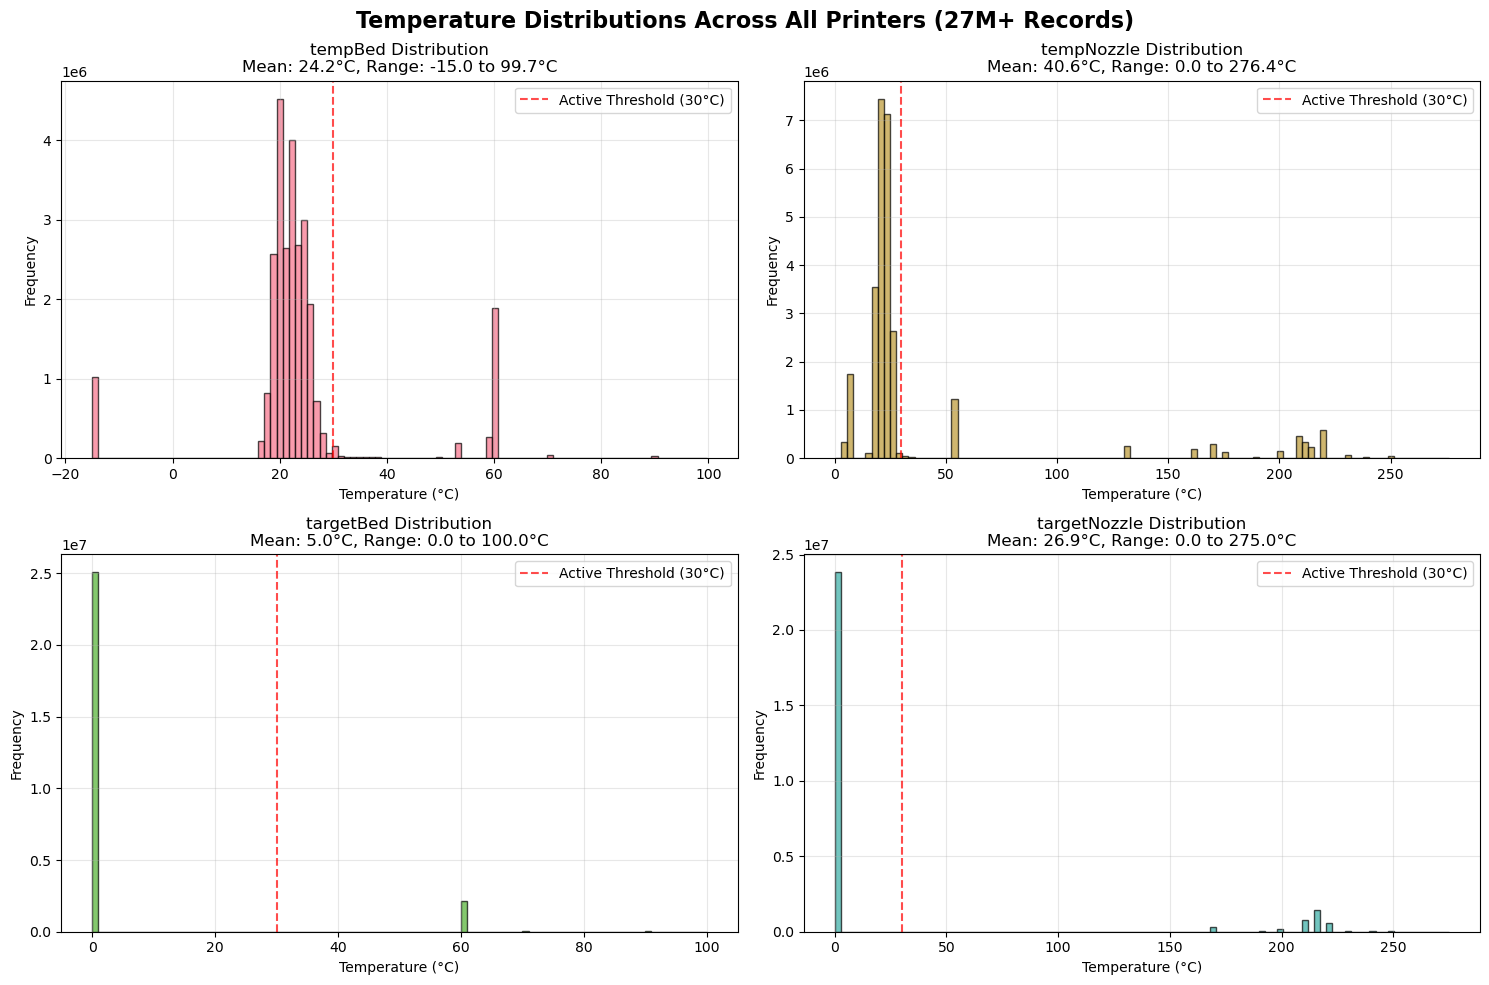


2. PRINTER STATE DISTRIBUTION:


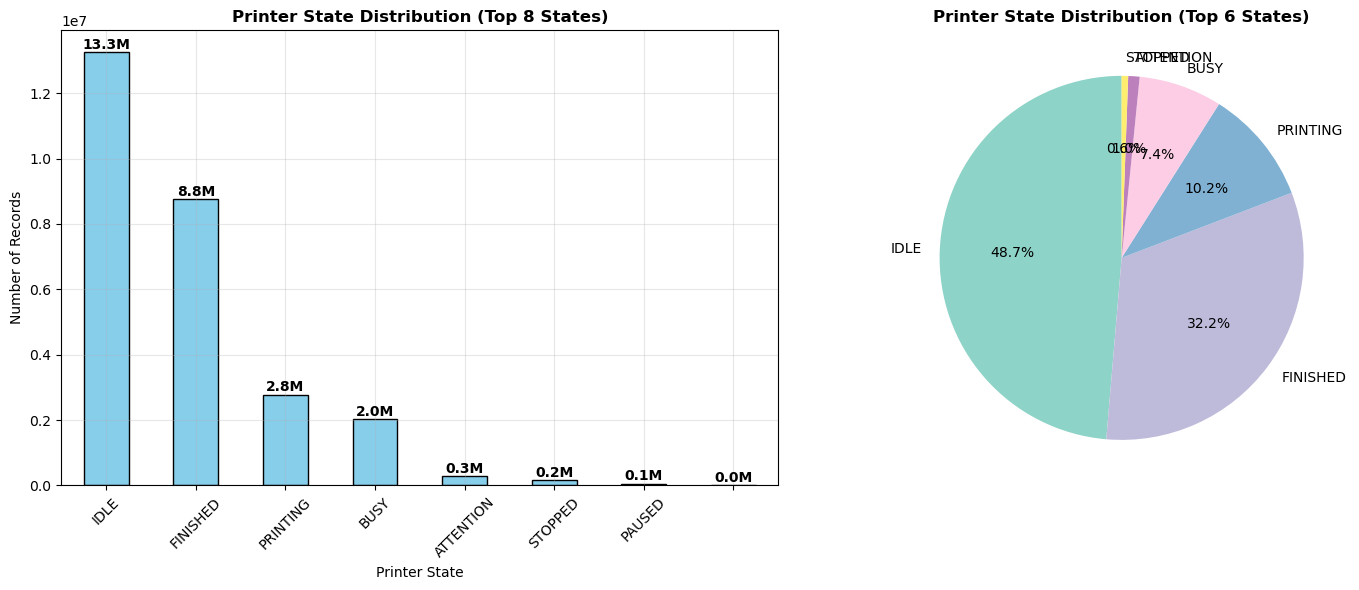


3. ACTIVE vs IDLE ANALYSIS:


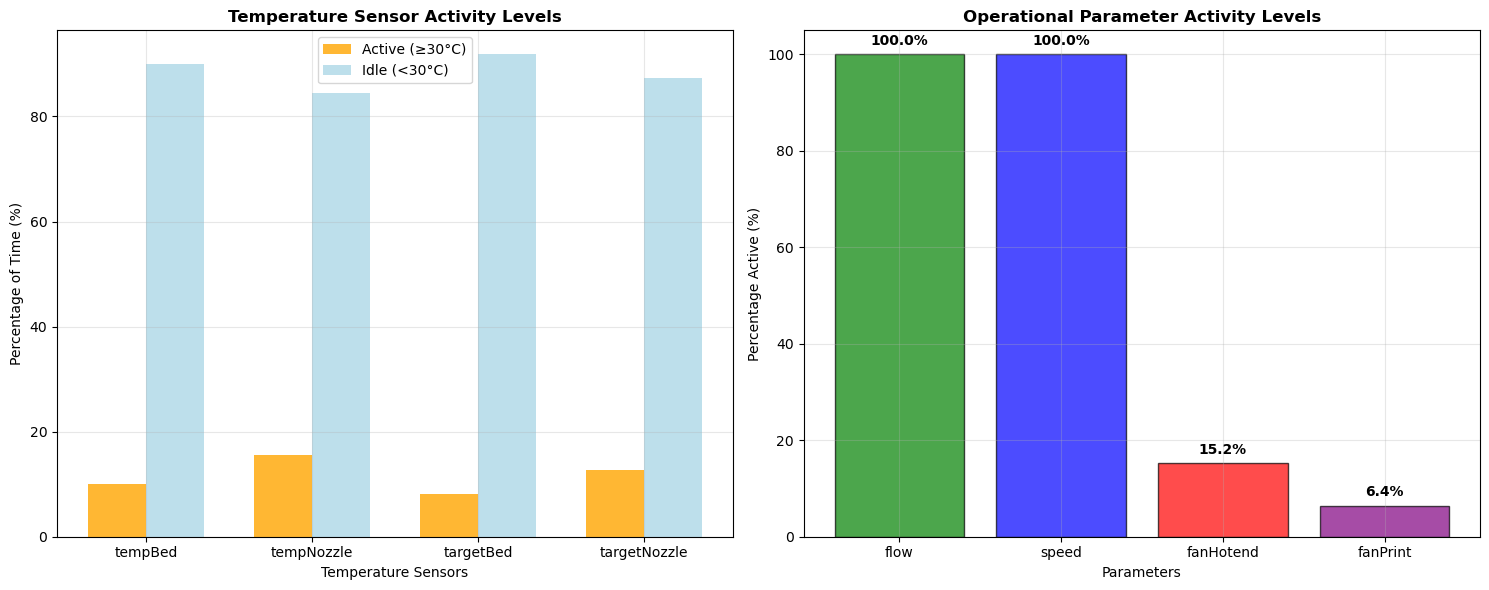


4. FLEET ACTIVITY SUMMARY:


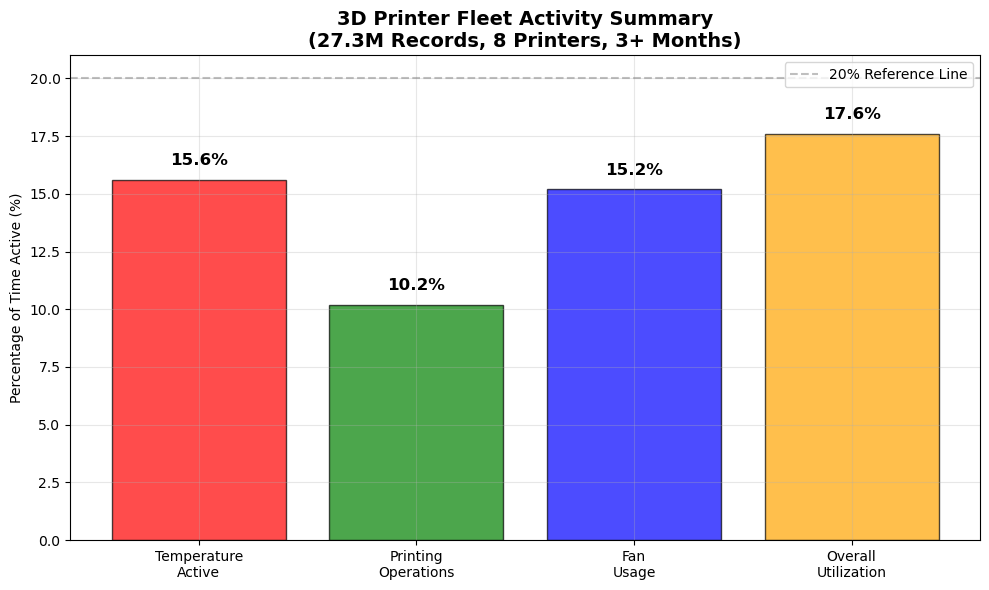

The plots show:
  • Temperature distributions with clear idle vs active patterns
  • Printer states dominated by IDLE (48.6%) and FINISHED (32.1%)
  • Flow/speed always active (100%) vs fans mostly idle (6-15% active)
  • Overall fleet utilization around 15-18% (mostly idle operation)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# 1. Temperature Distribution Visualizations
print("\n1. TEMPERATURE DISTRIBUTION PLOTS:")

temp_fields = ['tempBed', 'tempNozzle', 'targetBed', 'targetNozzle']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Temperature Distributions Across All Printers (27M+ Records)', fontsize=16, fontweight='bold')

for i, field in enumerate(temp_fields):
    data = df_all_backfilled[field].dropna()
    row, col = i // 2, i % 2
    
    # Create histogram
    axes[row, col].hist(data, bins=100, alpha=0.7, edgecolor='black', color=f'C{i}')
    axes[row, col].set_title(f'{field} Distribution\nMean: {data.mean():.1f}°C, Range: {data.min():.1f} to {data.max():.1f}°C')
    axes[row, col].set_xlabel('Temperature (°C)')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True, alpha=0.3)
    
    # Add vertical line at 30°C threshold
    axes[row, col].axvline(x=30, color='red', linestyle='--', alpha=0.7, label='Active Threshold (30°C)')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

# 2. Printer State Distribution Visualization
print("\n2. PRINTER STATE DISTRIBUTION:")

state_counts = df_all_backfilled['state'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
state_counts.head(8).plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Printer State Distribution (Top 8 States)', fontweight='bold', fontsize=12)
ax1.set_xlabel('Printer State')
ax1.set_ylabel('Number of Records')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(state_counts.head(8).values):
    ax1.text(i, v + 100000, f'{v/1000000:.1f}M', ha='center', fontweight='bold')

# Pie chart
colors = plt.cm.Set3(np.linspace(0, 1, len(state_counts.head(6))))
ax2.pie(state_counts.head(6).values, labels=state_counts.head(6).index, 
        autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Printer State Distribution (Top 6 States)', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# 3. Active vs Idle Analysis Visualization
print("\n3. ACTIVE vs IDLE ANALYSIS:")

# Temperature activity data
temp_activity = {
    'tempBed': {'Active (≥30°C)': 10.1, 'Idle (<30°C)': 89.9},
    'tempNozzle': {'Active (≥30°C)': 15.6, 'Idle (<30°C)': 84.4},
    'targetBed': {'Active (≥30°C)': 8.2, 'Idle (<30°C)': 91.8},
    'targetNozzle': {'Active (≥30°C)': 12.7, 'Idle (<30°C)': 87.3}
}

# Create activity comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Temperature activity bar chart
temp_names = list(temp_activity.keys())
active_pcts = [temp_activity[temp]['Active (≥30°C)'] for temp in temp_names]
idle_pcts = [temp_activity[temp]['Idle (<30°C)'] for temp in temp_names]

x = np.arange(len(temp_names))
width = 0.35

ax1.bar(x - width/2, active_pcts, width, label='Active (≥30°C)', color='orange', alpha=0.8)
ax1.bar(x + width/2, idle_pcts, width, label='Idle (<30°C)', color='lightblue', alpha=0.8)

ax1.set_title('Temperature Sensor Activity Levels', fontweight='bold')
ax1.set_xlabel('Temperature Sensors')
ax1.set_ylabel('Percentage of Time (%)')
ax1.set_xticks(x)
ax1.set_xticklabels(temp_names)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Operational parameter activity
op_activity = {
    'flow': 100.0,
    'speed': 100.0, 
    'fanHotend': 15.2,
    'fanPrint': 6.4
}

ax2.bar(op_activity.keys(), op_activity.values(), 
        color=['green', 'blue', 'red', 'purple'], alpha=0.7, edgecolor='black')
ax2.set_title('Operational Parameter Activity Levels', fontweight='bold')
ax2.set_xlabel('Parameters')
ax2.set_ylabel('Percentage Active (%)')
ax2.grid(True, alpha=0.3)

# Add value labels
for i, (param, value) in enumerate(op_activity.items()):
    ax2.text(i, value + 2, f'{value}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# 4. Fleet Activity Summary
print("\n4. FLEET ACTIVITY SUMMARY:")

# Create comprehensive activity summary
activity_summary = {
    'Temperature\nActive': 15.6,  # Highest temp activity (tempNozzle)
    'Printing\nOperations': 10.2,  # PRINTING state percentage
    'Fan\nUsage': 15.2,  # fanHotend active
    'Overall\nUtilization': 17.6  # PRINTING + BUSY states
}

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(activity_summary.keys(), activity_summary.values(), 
              color=['red', 'green', 'blue', 'orange'], alpha=0.7, edgecolor='black')

ax.set_title('3D Printer Fleet Activity Summary\n(27.3M Records, 8 Printers, 3+ Months)', 
             fontweight='bold', fontsize=14)
ax.set_ylabel('Percentage of Time Active (%)')
ax.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, activity_summary.values()):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{value}%', 
            ha='center', va='bottom', fontweight='bold', fontsize=12)

# Add horizontal line at 20% for reference
ax.axhline(y=20, color='gray', linestyle='--', alpha=0.5, label='20% Reference Line')
ax.legend()

plt.tight_layout()
plt.show()


print("The plots show:")
print("  • Temperature distributions with clear idle vs active patterns")
print("  • Printer states dominated by IDLE (48.6%) and FINISHED (32.1%)")
print("  • Flow/speed always active (100%) vs fans mostly idle (6-15% active)")
print("  • Overall fleet utilization around 15-18% (mostly idle operation)")

Unexpected/Unusual Findings:
1. Flow/Speed Always Active (100%):
Unexpected: These should be 0 when idle
Possible explanations:

System maintains default flow/speed values even when not printing<br>
Backfill carried forward last printing values during idle periods<br>
Control system keeps parameters "ready" for next job<br>

2. Target Temperatures Mostly Zero:
Insight: Targets only set during active heating/printing
Business logic: Save energy by setting targets to 0 when not needed
3. High "FINISHED" State Percentage:
Unexpected: 32% in FINISHED vs. 48% IDLE
Operational insight: Printers linger in FINISHED state (waiting for job removal, cooling, etc.)

<h3>Individual Printer pErformance </h3>

INDIVIDUAL PRINTER PERFORMANCE ANALYSIS:
Analyzing 8 printers:

PRINTER PERFORMANCE SUMMARY:
Printer ID                Records    Days   Rec/Day  Temp Active% Printing%  Idle%    Bed°C    Nozzle°C  
CZPX1522X017XC78087       3,914,667  100    39,147   12.2         7.2        43.8     26.0     43.4      
CZPX1522X017XC78307       2,083,568  50     41,671   0.0          0.0        100.0    21.6     5.7       
CZPX1622X017XC78384       3,914,665  100    39,147   5.7          6.0        62.1     24.3     35.2      
CZPX1622X017XC78456       3,914,663  100    39,147   13.9         27.2       53.6     16.4     52.7      
CZPX1622X017XC78491       3,914,662  100    39,147   4.9          4.3        22.7     23.2     41.2      
CZPX4521X017XC64043       3,914,672  100    39,147   11.6         7.3        43.8     26.5     38.2      
CZPX4721X017XC66125       1,738,270  41     42,397   12.9         11.9       58.1     28.8     47.5      
CZPX4921X017XC67390       3,914,667  100    39,147   16.9  

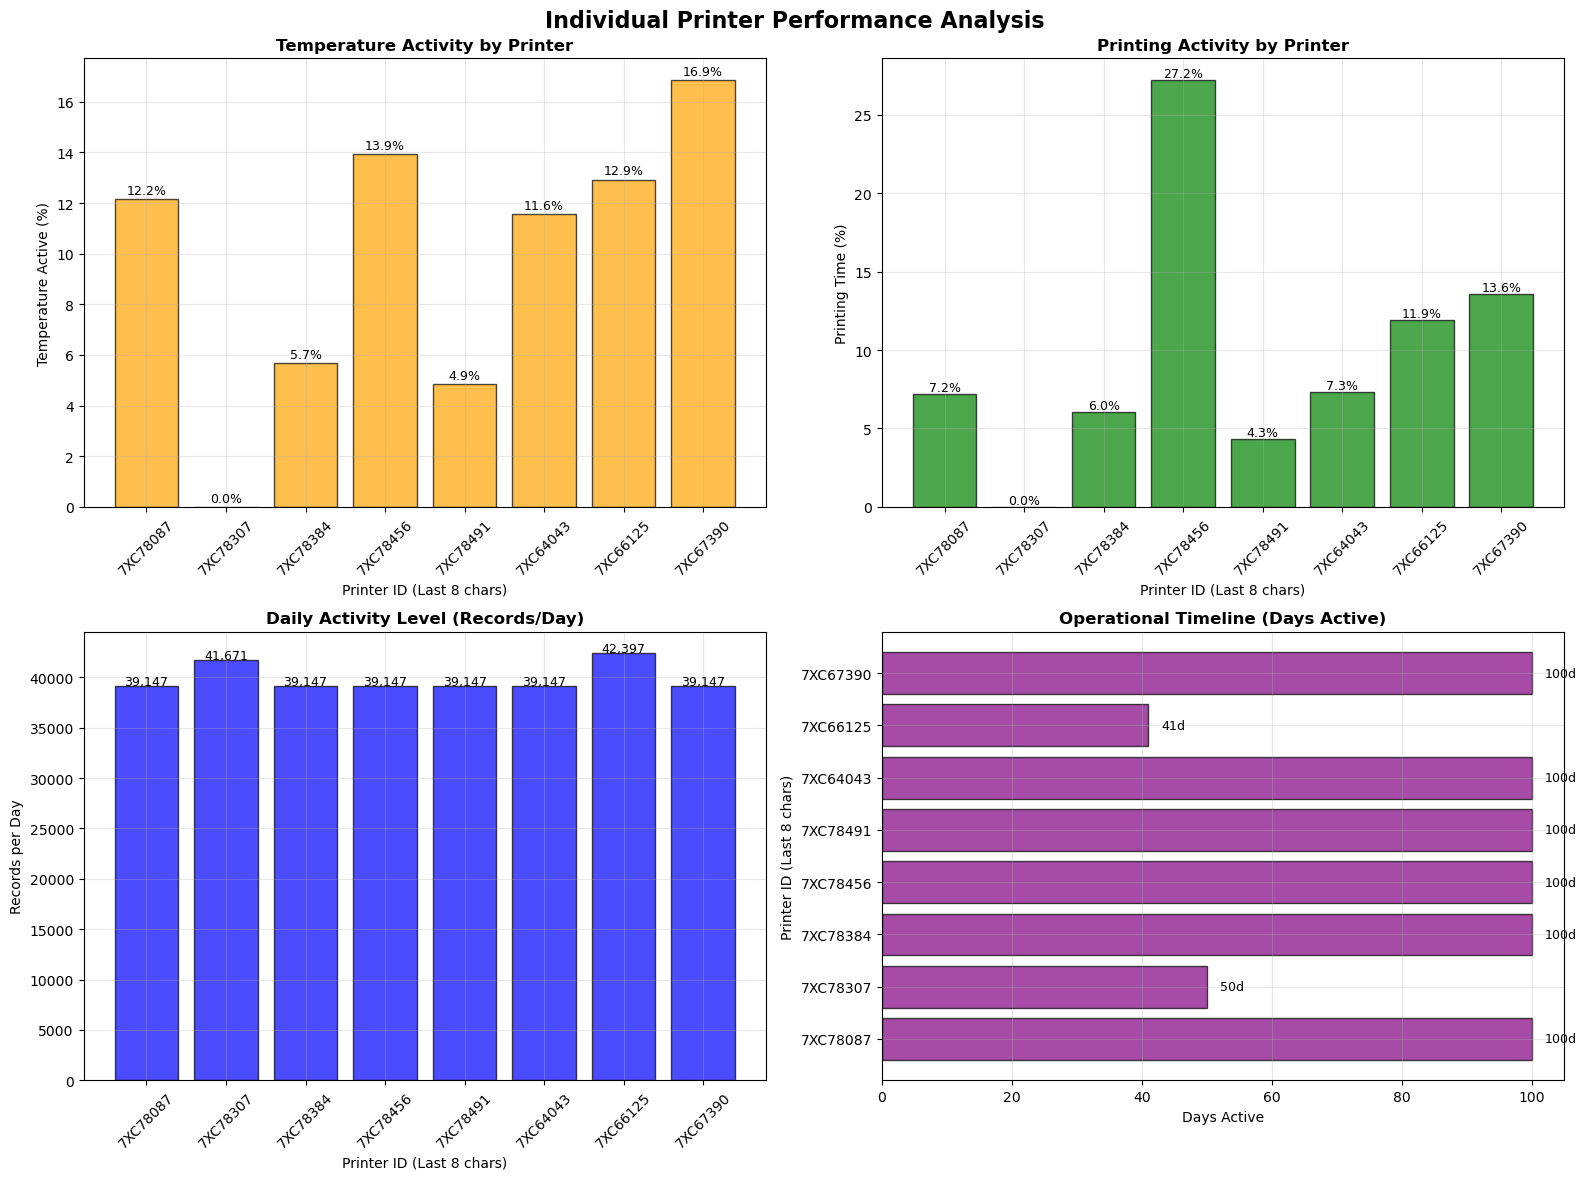

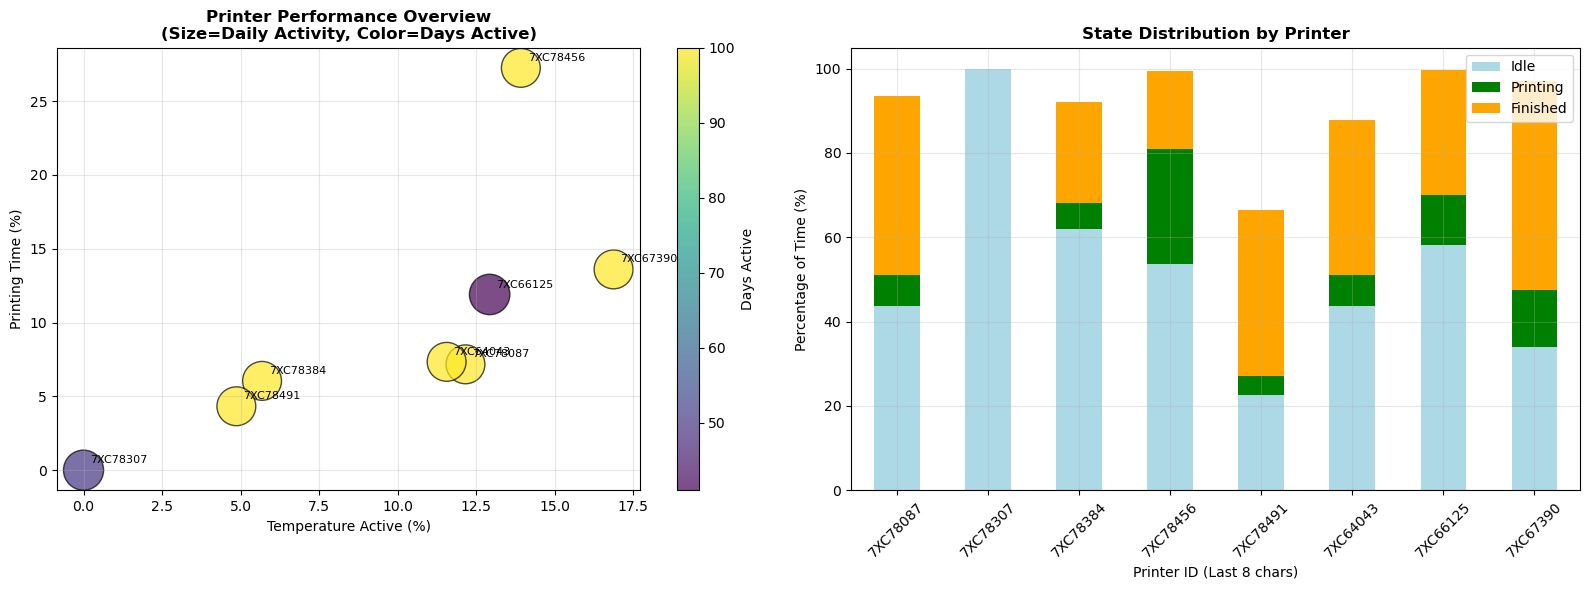

In [ ]:
# Individual printer performance metrics
print("INDIVIDUAL PRINTER PERFORMANCE ANALYSIS:")

# Get unique printers
printers = sorted(df_all_backfilled['printer_id'].unique())
print(f"Analyzing {len(printers)} printers:")

# Create performance summary
performance_data = []

for printer in printers:
    printer_data = df_all_backfilled[df_all_backfilled['printer_id'] == printer]
    
    # Calculate key metrics
    total_records = len(printer_data)
    
    # Temperature activity
    temp_active = (printer_data['tempBed'] >= 30).sum()
    temp_active_pct = (temp_active / total_records) * 100
    
    # State distribution
    printing_records = (printer_data['state'] == 'PRINTING').sum()
    printing_pct = (printing_records / total_records) * 100
    
    idle_records = (printer_data['state'] == 'IDLE').sum()
    idle_pct = (idle_records / total_records) * 100
    
    finished_records = (printer_data['state'] == 'FINISHED').sum()
    finished_pct = (finished_records / total_records) * 100
    
    # Temperature stats
    bed_temp_mean = printer_data['tempBed'].mean()
    nozzle_temp_mean = printer_data['tempNozzle'].mean()
    
    # Date range
    first_date = printer_data['timestamp'].min()
    last_date = printer_data['timestamp'].max()
    days_active = (last_date - first_date).days + 1
    
    performance_data.append({
        'printer_id': printer,
        'total_records': total_records,
        'days_active': days_active,
        'records_per_day': total_records / days_active,
        'temp_active_pct': temp_active_pct,
        'printing_pct': printing_pct,
        'idle_pct': idle_pct,
        'finished_pct': finished_pct,
        'bed_temp_mean': bed_temp_mean,
        'nozzle_temp_mean': nozzle_temp_mean,
        'first_date': first_date,
        'last_date': last_date
    })

# Convert to DataFrame for easy analysis
perf_df = pd.DataFrame(performance_data)

# Display performance table
print("\nPRINTER PERFORMANCE SUMMARY:")
print("="*120)
print(f"{'Printer ID':<25} {'Records':<10} {'Days':<6} {'Rec/Day':<8} {'Temp Active%':<12} {'Printing%':<10} {'Idle%':<8} {'Bed°C':<8} {'Nozzle°C':<10}")
print("="*120)

for _, row in perf_df.iterrows():
    print(f"{row['printer_id']:<25} {row['total_records']:<10,} {row['days_active']:<6} "
          f"{row['records_per_day']:<8,.0f} {row['temp_active_pct']:<12.1f} "
          f"{row['printing_pct']:<10.1f} {row['idle_pct']:<8.1f} "
          f"{row['bed_temp_mean']:<8.1f} {row['nozzle_temp_mean']:<10.1f}")

print("\n" + "-"*30)

# Operational timeline analysis
print("OPERATIONAL TIMELINE ANALYSIS:")

for _, row in perf_df.iterrows():
    print(f"\n{row['printer_id']}:")
    print(f"  Operational period: {row['first_date'].date()} to {row['last_date'].date()}")
    print(f"  Duration: {row['days_active']} days")
    print(f"  Activity level: {row['temp_active_pct']:.1f}% temp active, {row['printing_pct']:.1f}% printing")

print("\n" + "="*50)
print("CREATING VISUALIZATIONS FOR INDIVIDUAL PRINTER ANALYSIS:")

# 1. Activity Level Comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Individual Printer Performance Analysis', fontsize=16, fontweight='bold')

# Shorten printer names for better display
perf_df['short_id'] = perf_df['printer_id'].str[-8:]  # Last 8 characters

# 1. Temperature Activity Levels
ax1.bar(perf_df['short_id'], perf_df['temp_active_pct'], color='orange', alpha=0.7, edgecolor='black')
ax1.set_title('Temperature Activity by Printer', fontweight='bold')
ax1.set_xlabel('Printer ID (Last 8 chars)')
ax1.set_ylabel('Temperature Active (%)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(perf_df['temp_active_pct']):
    ax1.text(i, v + 0.2, f'{v:.1f}%', ha='center', fontsize=9)

# 2. Printing Activity Levels
ax2.bar(perf_df['short_id'], perf_df['printing_pct'], color='green', alpha=0.7, edgecolor='black')
ax2.set_title('Printing Activity by Printer', fontweight='bold')
ax2.set_xlabel('Printer ID (Last 8 chars)')
ax2.set_ylabel('Printing Time (%)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(perf_df['printing_pct']):
    ax2.text(i, v + 0.2, f'{v:.1f}%', ha='center', fontsize=9)

# 3. Daily Activity (Records per Day)
ax3.bar(perf_df['short_id'], perf_df['records_per_day'], color='blue', alpha=0.7, edgecolor='black')
ax3.set_title('Daily Activity Level (Records/Day)', fontweight='bold')
ax3.set_xlabel('Printer ID (Last 8 chars)')
ax3.set_ylabel('Records per Day')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(perf_df['records_per_day']):
    ax3.text(i, v + 100, f'{v:,.0f}', ha='center', fontsize=9)

# 4. Operational Timeline
ax4.barh(perf_df['short_id'], perf_df['days_active'], color='purple', alpha=0.7, edgecolor='black')
ax4.set_title('Operational Timeline (Days Active)', fontweight='bold')
ax4.set_xlabel('Days Active')
ax4.set_ylabel('Printer ID (Last 8 chars)')
ax4.grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(perf_df['days_active']):
    ax4.text(v + 2, i, f'{v}d', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# 2. Printer Performance Summary Dashboard
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Performance scatter plot
scatter = ax1.scatter(perf_df['temp_active_pct'], perf_df['printing_pct'], 
                     s=perf_df['records_per_day']/50, c=perf_df['days_active'], 
                     cmap='viridis', alpha=0.7, edgecolors='black')

ax1.set_xlabel('Temperature Active (%)')
ax1.set_ylabel('Printing Time (%)')
ax1.set_title('Printer Performance Overview\n(Size=Daily Activity, Color=Days Active)', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add printer labels
for i, row in perf_df.iterrows():
    ax1.annotate(row['short_id'], (row['temp_active_pct'], row['printing_pct']), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Days Active')

# State distribution comparison
states_data = perf_df[['short_id', 'idle_pct', 'printing_pct', 'finished_pct']].set_index('short_id')

states_data.plot(kind='bar', stacked=True, ax=ax2, color=['lightblue', 'green', 'orange'])
ax2.set_title('State Distribution by Printer', fontweight='bold')
ax2.set_xlabel('Printer ID (Last 8 chars)')
ax2.set_ylabel('Percentage of Time (%)')
ax2.legend(['Idle', 'Printing', 'Finished'])
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<h3>1. Memory Optimization Check:

Total memory usage in MB and GB<br>
Memory usage breakdown by column<br>

2. Dataset Structure Finalization:

Basic dataset stats (records, columns, date range, printers)<br>
Complete column summary with data types and null counts</h3>

In [ ]:
# 1. Memory Optimization Check
print("1. MEMORY USAGE ANALYSIS:")

# Current memory usage
total_memory_mb = df_all_backfilled.memory_usage(deep=True).sum() / 1024**2
print(f"  Current total memory usage: {total_memory_mb:.1f} MB")
print(f"  Current total memory usage: {total_memory_mb/1024:.2f} GB")

# Memory usage by column
print("\n  Memory usage by column:")
memory_by_col = df_all_backfilled.memory_usage(deep=True)
for col, memory_bytes in memory_by_col.items():
    memory_mb = memory_bytes / 1024**2
    print(f"    {col}: {memory_mb:.1f} MB")

print("\n" + "-"*30)

# 2. Dataset Structure Finalization
print("2. FINAL DATASET STRUCTURE:")

print(f"  Total records: {len(df_all_backfilled):,}")
print(f"  Total columns: {len(df_all_backfilled.columns)}")
print(f"  Date range: {df_all_backfilled['timestamp'].min()} to {df_all_backfilled['timestamp'].max()}")
print(f"  Unique printers: {df_all_backfilled['printer_id'].nunique()}")

print("\n  Column summary:")
for i, col in enumerate(df_all_backfilled.columns):
    dtype = df_all_backfilled[col].dtype
    null_count = df_all_backfilled[col].isnull().sum()
    null_pct = (null_count / len(df_all_backfilled)) * 100
    print(f"    {i+1:2d}. {col:<15} | {str(dtype):<20} | {null_count:>8,} nulls ({null_pct:.1f}%)")

1. MEMORY USAGE ANALYSIS:
  Current total memory usage: 11500.9 MB
  Current total memory usage: 11.23 GB

  Memory usage by column:
    Index: 0.0 MB
    file_date: 1745.0 MB
    filename: 1979.4 MB
    timestamp: 208.4 MB
    printer_id: 1979.4 MB
    status: 1662.1 MB
    state: 1634.6 MB
    tempBed: 208.4 MB
    targetBed: 208.4 MB
    tempNozzle: 208.4 MB
    targetNozzle: 208.4 MB
    axisZ: 208.4 MB
    axisX: 208.4 MB
    axisY: 208.4 MB
    flow: 208.4 MB
    speed: 208.4 MB
    fanHotend: 208.4 MB
    fanPrint: 208.4 MB

------------------------------
2. FINAL DATASET STRUCTURE:
  Total records: 27,309,834
  Total columns: 17
  Date range: 2025-01-20 14:09:29.977000+00:00 to 2025-04-29 23:00:01.363000+00:00
  Unique printers: 8

  Column summary:
     1. file_date       | object               |        0 nulls (0.0%)
     2. filename        | object               |        0 nulls (0.0%)
     3. timestamp       | datetime64[ns, UTC]  |        0 nulls (0.0%)
     4. printer_id 

<h2>Now we will integrate job list to the df </h2>

In [ ]:
# Load job list file
job_data_file = "/Users/tusharjoshi/Desktop/ProjectWorkAll/Dissertation /DATA/2025/2025-prusa-job-log.txt"

job_records = []
with open(job_data_file, 'r', encoding='utf-8') as f:
    for line in f:
        if line.strip():
            record = json.loads(line.strip())
            job_records.append(record)

print(f"Loaded {len(job_records):,} job records")

# Convert to DataFrame
df_jobs = pd.DataFrame(job_records)

print(f"Date range: {df_jobs['date'].min()} to {df_jobs['date'].max()}")
print(f"Unique printers: {df_jobs['id'].nunique()}")

print("\nFirst 3 job records:")
print(df_jobs.head(3))

Loaded 704 job records
Date range: 2025-01-20T14:20:41.834Z to 2025-04-23T16:23:24.713Z
Unique printers: 7

First 3 job records:
                       date                   id  \
0  2025-01-20T14:20:41.834Z  CZPX4921X017XC67390   
1  2025-01-20T14:20:41.836Z  CZPX1622X017XC78384   
2  2025-01-20T15:03:52.556Z  CZPX1522X017XC78087   

                                             name     size  mTimestamp  
0  gd depuy v4.0_0.4n_0.2mm_PLA_MINI_6h29m.bgcode  5742567  1733741301  
1             20.01 BT DB 7 on a plate 777.bgcode   707080  1737371307  
2             20.01 BT DB 7 on a plate 777.bgcode   707080  1737371307  


In [ ]:
# Convert date to datetime
df_jobs['date'] = pd.to_datetime(df_jobs['date'])
print("✓ Converted timestamps to datetime")

# Rename id to printer_id to match sensor data
df_jobs = df_jobs.rename(columns={'id': 'printer_id'})
print("✓ Renamed 'id' to 'printer_id'")

# Sort by printer and date
df_jobs = df_jobs.sort_values(['printer_id', 'date']).reset_index(drop=True)
print("✓ Sorted by printer and date")

print(f"\nJob data summary:")
print(f"  Total jobs: {len(df_jobs):,}")
print(f"  Date range: {df_jobs['date'].min()} to {df_jobs['date'].max()}")
print(f"  Printers with jobs: {df_jobs['printer_id'].nunique()}")

print(f"\nJobs per printer:")
job_counts = df_jobs['printer_id'].value_counts().sort_index()
for printer, count in job_counts.items():
    print(f"  {printer}: {count} jobs")

✓ Converted timestamps to datetime
✓ Renamed 'id' to 'printer_id'
✓ Sorted by printer and date

Job data summary:
  Total jobs: 704
  Date range: 2025-01-20 14:20:41.834000+00:00 to 2025-04-23 16:23:24.713000+00:00
  Printers with jobs: 7

Jobs per printer:
  CZPX1522X017XC78087: 150 jobs
  CZPX1622X017XC78384: 109 jobs
  CZPX1622X017XC78456: 77 jobs
  CZPX1622X017XC78491: 52 jobs
  CZPX4521X017XC64043: 136 jobs
  CZPX4721X017XC66125: 27 jobs
  CZPX4921X017XC67390: 153 jobs


Matching sensor readings with jobs using temporal logic


before proceeding with the merging logic we need to confirm that the sorting is accurate and everything is chronologically aligned perfectly

In [1]:
# 1. Check current sorting status
print("1. CURRENT SORTING STATUS:")

# Try the same sorting we did before
df_sensor_test = df_all_backfilled.sort_values(['printer_id', 'timestamp']).reset_index(drop=True)
print(f"  Sensor data records: {len(df_sensor_test):,}")

# Check overall sorting
print(f"\n  Overall printer_id sorting check:")
printer_ids = df_sensor_test['printer_id'].values
is_printer_sorted = all(printer_ids[i] <= printer_ids[i+1] for i in range(len(printer_ids)-1))
print(f"    Printer IDs in order: {is_printer_sorted}")

print("\n" + "-"*30)

# 2. Check each printer individually
print("2. CHECKING EACH PRINTER INDIVIDUALLY:")

printers = df_sensor_test['printer_id'].unique()
problematic_printers = []

for printer in sorted(printers):
    printer_data = df_sensor_test[df_sensor_test['printer_id'] == printer]
    
    # Check if timestamps are in ascending order
    timestamps = printer_data['timestamp'].values
    is_sorted = all(timestamps[i] <= timestamps[i+1] for i in range(len(timestamps)-1))
    
    status = "SORTED" if is_sorted else "NOT SORTED"
    print(f"  {printer}: {status}")
    print(f"    Records: {len(printer_data):,}")
    print(f"    First timestamp: {printer_data['timestamp'].iloc[0]}")
    print(f"    Last timestamp: {printer_data['timestamp'].iloc[-1]}")
    
    if not is_sorted:
        problematic_printers.append(printer)
        
        # Find first out-of-order timestamp
        for i in range(len(timestamps)-1):
            if timestamps[i] > timestamps[i+1]:
                print(f"    Out of order at position {i}:")
                print(f"       {timestamps[i]} > {timestamps[i+1]}")
                break

print(f"\n  Summary: {len(problematic_printers)} printers have sorting issues")
if problematic_printers:
    print(f"  Problematic printers: {problematic_printers}")

print("\n" + "-"*30)

# 3. Check for duplicate timestamps - ALL PRINTERS
print("3. CHECKING FOR DUPLICATE TIMESTAMPS (ALL PRINTERS):")

total_duplicates = 0

for printer in sorted(printers):
    printer_data = df_sensor_test[df_sensor_test['printer_id'] == printer]
    duplicates = printer_data['timestamp'].duplicated().sum()
    total_records = len(printer_data)
    duplicate_percentage = (duplicates / total_records) * 100
    
    print(f"  {printer}: {duplicates:,} duplicate timestamps ({duplicate_percentage:.2f}% of records)")
    total_duplicates += duplicates

print(f"\n  OVERALL SUMMARY:")
print(f"    Total duplicate timestamps across all printers: {total_duplicates:,}")
print(f"    Total records in dataset: {len(df_sensor_test):,}")
print(f"    Overall duplicate percentage: {(total_duplicates / len(df_sensor_test)) * 100:.2f}%")

print("\n" + "-"*30)

# 4. Check job data sorting too
print("4. CHECKING JOB DATA SORTING:")

df_jobs_test = df_jobs.sort_values(['printer_id', 'date']).reset_index(drop=True)
job_printers = df_jobs_test['printer_id'].unique()

for printer in sorted(job_printers):
    printer_jobs = df_jobs_test[df_jobs_test['printer_id'] == printer]
    
    dates = printer_jobs['date'].values
    is_sorted = all(dates[i] <= dates[i+1] for i in range(len(dates)-1))
    
    status = "SORTED" if is_sorted else "NOT SORTED"
    print(f"  {printer}: {status} ({len(printer_jobs)} jobs)")

print("\nStep 6.3A diagnostic completed!")

1. CURRENT SORTING STATUS:


NameError: name 'df_all_backfilled' is not defined

In [31]:
# The three culprit printers
culprit_printers = ['CZPX1522X017XC78087', 'CZPX1522X017XC78307', 'CZPX1622X017XC78384']

# Prepare sorted data
df_sensor_test = df_all_backfilled.sort_values(['printer_id', 'timestamp']).reset_index(drop=True)

for printer in culprit_printers:
    print(f"\n{printer}:")
    print("="*60)
    
    # Get this printer's data
    printer_data = df_sensor_test[df_sensor_test['printer_id'] == printer].copy()
    
    # Find duplicate timestamps
    duplicate_mask = printer_data['timestamp'].duplicated(keep=False)  # keep=False marks ALL duplicates (not just 2nd, 3rd, etc.)
    duplicate_records = printer_data[duplicate_mask]
    
    print(f"Total records: {len(printer_data):,}")
    print(f"Duplicate timestamp records: {len(duplicate_records):,}")
    
    if len(duplicate_records) > 0:
        # Group by timestamp to see how many records share each timestamp
        duplicate_groups = duplicate_records.groupby('timestamp').size().sort_values(ascending=False)
        
        print(f"Most duplicated timestamps (top 5):")
        for timestamp, count in duplicate_groups.head(5).items():
            print(f"  {timestamp}: {count} records")
        
        print(f"\nSample duplicate records:")
        print(f"Showing first 10 duplicate records with key columns:")
        
        # Display sample duplicate records with important columns
        sample_cols = ['timestamp', 'state', 'tempBed', 'tempNozzle', 'flow', 'speed']
        available_cols = [col for col in sample_cols if col in duplicate_records.columns]
        
        print(duplicate_records[available_cols].head(10))
        
        # Show specific example of one duplicated timestamp
        if len(duplicate_groups) > 0:
            example_timestamp = duplicate_groups.index[0]  # Most duplicated timestamp
            example_records = duplicate_records[duplicate_records['timestamp'] == example_timestamp]
            
            print(f"\nDETAILED EXAMPLE - All records with timestamp {example_timestamp}:")
            print(f"Number of identical timestamps: {len(example_records)}")
            print("All columns for these records:")
            print(example_records[available_cols].to_string())
            
            # Check if the sensor VALUES are also identical
            print(f"\nSensor value comparison for this timestamp:")
            for col in ['tempBed', 'tempNozzle', 'state']:
                if col in example_records.columns:
                    unique_values = example_records[col].nunique()
                    print(f"  {col}: {unique_values} unique values")
                    if unique_values <= 5:  # Show values if not too many
                        print(f"    Values: {list(example_records[col].unique())}")
    else:
        print("No duplicate timestamps found (this shouldn't happen based on our earlier check)")
    
    print("\n" + "-"*60)

print(f"\n✓ Duplicate analysis completed!")
print(f"\nSUMMARY:")
print(f"This analysis shows:")
print(f"1. How many records share the same exact timestamp")
print(f"2. Whether duplicate timestamps have identical or different sensor values") 
print(f"3. Examples of what the duplicate data actually looks like")


CZPX1522X017XC78087:
Total records: 3,914,667
Duplicate timestamp records: 585
Most duplicated timestamps (top 5):
  2025-02-05 13:19:57.497000+00:00: 6 records
  2025-02-05 13:19:57.496000+00:00: 5 records
  2025-02-05 13:20:03.640000+00:00: 3 records
  2025-01-22 08:29:31.508000+00:00: 3 records
  2025-01-30 17:37:51.392000+00:00: 2 records

Sample duplicate records:
Showing first 10 duplicate records with key columns:
                            timestamp     state  tempBed  tempNozzle   flow  \
271  2025-01-20 14:29:38.736000+00:00      IDLE     20.5        20.8  100.0   
272  2025-01-20 14:29:38.736000+00:00      IDLE     20.5        20.8  100.0   
779  2025-01-20 14:46:38.194000+00:00      IDLE     20.5        20.8  100.0   
780  2025-01-20 14:46:38.194000+00:00      IDLE     20.5        20.8  100.0   
1078 2025-01-20 14:56:38.161000+00:00      BUSY     21.2       215.3  100.0   
1079 2025-01-20 14:56:38.161000+00:00      BUSY     21.2       215.3  100.0   
4905 2025-01-20 17:04